In [1]:
import coba as cb
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.container   import ErrorbarContainer
from matplotlib.lines       import Line2D
from matplotlib.collections import LineCollection

c1 = "#0072B2"
c2 = "#E69F00"
c3 = "#009E73"
c4 = "#56B4E9"
c5 = "#D55E00"

figsize = (8,6)
plt.rc('font',weight='normal',size=16)
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.linewidth'] = 3
cb.CobaContext.store['elinewidth'] = 2

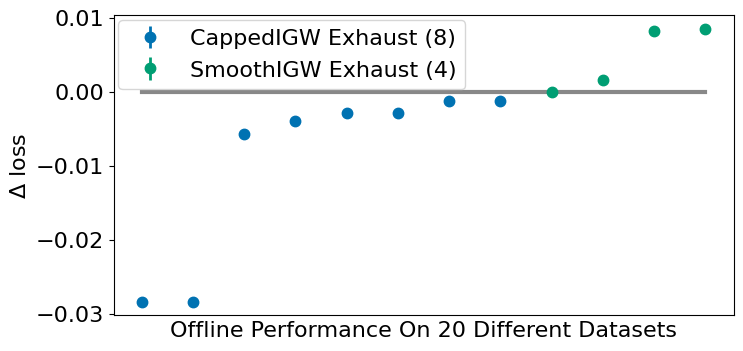

In [43]:
#WARNING: This takes a very long time to finish
%run run_online.py
%run run_offline.py

In [2]:
online_logs = cb.Environments.from_save("online.zip")
online      = cb.Result.from_logged_envs(online_logs.batch(8)) 
offline     = cb.Result.from_file("offline.gz")

In [ ]:
plt.figure(figsize=figsize)
online.plot_contrast(0,1,l='learner_id',p=['openml_data','openml_task'],x=['openml_data','openml_task'],err=cb.BootstrapCI(.9,cb.mean),labels=['SmoothIGW','CappedIGW'],colors=[c1,c2,c3],out=None)
plt.title("", loc='left')
plt.xticks([])
plt.xlabel('Online Performance On 20 Different Datasets')
plt.ylabel('$\\Delta$ Loss')

line    = Line2D([],[],marker='o',markersize=7, ls="none", color=c1)
barline = LineCollection(np.empty((0,0,0)),linewidths=(2))
err     = ErrorbarContainer((line, [], [barline]), has_xerr=False, has_yerr=True)
handles, labels = plt.gca().get_legend_handles_labels()
#plt.legend([err]+handles,['SmoothIGW (0)']+labels,loc='upper left')

plt.show()
#plt.savefig('online_diff.pdf',format='pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=figsize)
offline.plot_contrast((0,None),(1,24),l=['learner_id','k_inf'],p=['openml_data','openml_task'],x=['openml_data','openml_task'],err=cb.BootstrapCI(.9,cb.mean),labels=['SmoothIGW Exhaust','CappedIGW Exhaust'],colors=[c1,c2,c3],out=None)
plt.title("", loc='left')
plt.xticks([])
plt.xlabel('Offline Performance On 20 Different Datasets')
plt.ylabel('$\\Delta$ loss')
plt.legend(loc='upper left',bbox_to_anchor=(-.01,1.02))

plt.show()
#plt.savefig('offline_diff.pdf',format='pdf', bbox_inches="tight")

In [ ]:
class prob_none_as_reward:   
    def filter(self, interactions):
        for interaction in interactions:
            new = interaction.copy()
            new['reward'] = 100 if new['probability'] is None else 0
            yield new
            
old_exhaust  = cb.Environments([e for e in online_logs if e.params['sampler'] == 'old'])
old_none_pct = cb.Result.from_logged_envs(old_exhaust.unbatch().filter(prob_none_as_reward()))

plt.figure(figsize=figsize)
old_none_pct.plot_learners(out=None,labels=['SmoothIGW'],err=cb.BootstrapCI(.9,cb.mean),colors=[c1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.ylabel('Greedy Frequency')
plt.title("", loc='left')
plt.legend(loc='lower right')

plt.show()
#plt.savefig('indicator_freq.pdf',format='pdf', bbox_inches="tight")

In [ ]:
plt.figure(figsize=(6,3.75))

online.filter_fin().filter_lrn(learner_id=[1,2,3]).plot_learners(p=['openml_task','openml_data'],x=['openml_task','openml_data'],labels=['24','4','2'],colors=[c2,c3,c1],err='se',out=None)

plt.title('',loc='left')
plt.xticks([])
plt.xlabel('Performance On 20 Different Datasets')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncols=3, handlelength=1, handletextpad=.05, columnspacing=1)

plt.show()
#plt.savefig('k_online.pdf',format='pdf', bbox_inches="tight")